<a href="https://colab.research.google.com/github/charles14525/Emerging-technology-2/blob/main/HOA_11_1_IPYNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [24]:
df = pd.read_csv('/content/IBM_2006-01-01_to_2018-01-01.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [25]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3020 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3020 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3020 non-null   float64
 4   Volume  3020 non-null   int64  
 5   Name    3020 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.2+ KB


,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [26]:
train = df[df.index < '2017-01-01']
test = df[df.index >= '2017-01-01']

In [27]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(train[['Close']])

for missing values

In [28]:
print(df.isnull().sum())

Open      1
High      0
Low       1
Close     0
Volume    0
Name      0
dtype: int64


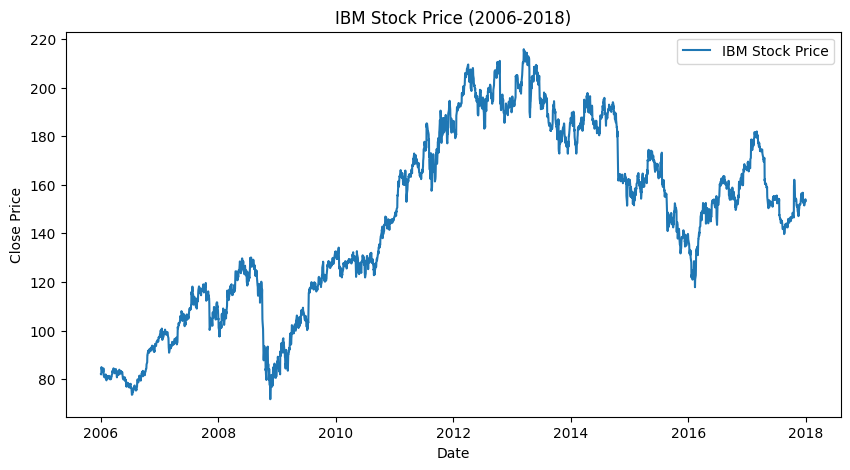

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='IBM Stock Price')
plt.title('IBM Stock Price (2006-2018)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [30]:
X_train = []
y_train = []

for i in range(60, len(scaled_train)):
    X_train.append(scaled_train[i-60:i, 0])
    y_train.append(scaled_train[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))


In [35]:
training_set = df[df.index < '2017-01-01']['Close']
test_set = df[df.index >= '2017-01-01']['Close']

In [36]:
scaler = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = scaler.fit_transform(training_set.values.reshape(-1, 1))

In [31]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(60, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [33]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=2, batch_size=32)

Epoch 1/2
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0791
Epoch 2/2
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.0042


In [42]:
full_data = pd.concat((training_set, test_set), axis=0)
inputs = full_data[len(full_data) - len(test_set) - 60:].values
inputs = scaler.transform(inputs.reshape(-1, 1))

X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [43]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step


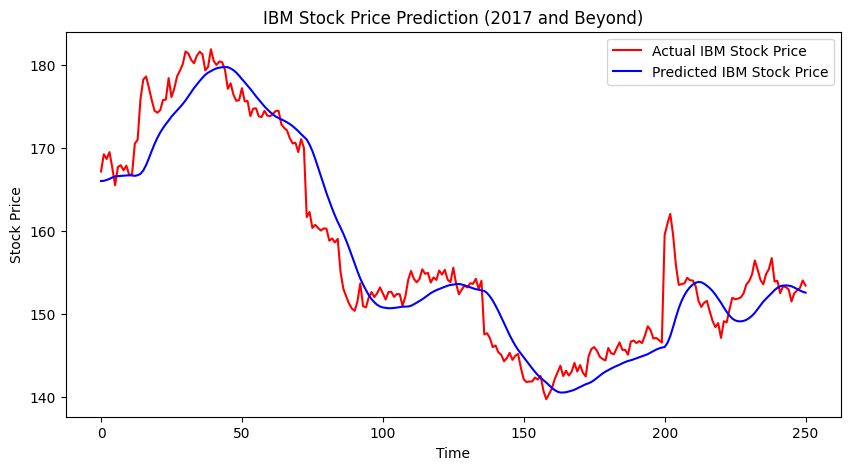

In [44]:
plt.figure(figsize=(10, 5))
plt.plot(test_set.values, color='red', label='Actual IBM Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted IBM Stock Price')
plt.title('IBM Stock Price Prediction (2017 and Beyond)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()